# Tentukan library yang akan digunakan

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

# Load data set

In [2]:
# Membaca dataset dari file CSV
# Dataset : https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset/discussion/245513
df = pd.read_csv("healthcare-dataset-stroke-data.csv")

# Memahami Data / Data Understanding

In [3]:
df.head(n = 10) # menampilkan 10 data teratasS

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


In [4]:
df.tail(n = 10) # menampilkan 10 data terakhir

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5100,68398,Male,82.0,1,0,Yes,Self-employed,Rural,71.97,28.3,never smoked,0
5101,36901,Female,45.0,0,0,Yes,Private,Urban,97.95,24.5,Unknown,0
5102,45010,Female,57.0,0,0,Yes,Private,Rural,77.93,21.7,never smoked,0
5103,22127,Female,18.0,0,0,No,Private,Urban,82.85,46.9,Unknown,0
5104,14180,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


In [5]:
df.describe() # informasi dari data

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [6]:
# Mengecek type data dari data

df.info(show_counts=True, memory_usage=True, verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [7]:
# melihat data yang bertipe object dengan mengabaikan int dan float
df.describe(exclude=[int,float])

,gender,ever_married,work_type,Residence_type,smoking_status
count,5110,5110,5110,5110,5110
unique,3,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2994,3353,2925,2596,1892


In [8]:
# Melihat nama nama Kolom
list(df.columns)

['id',
 'gender',
 'age',
 'hypertension',
 'heart_disease',
 'ever_married',
 'work_type',
 'Residence_type',
 'avg_glucose_level',
 'bmi',
 'smoking_status',
 'stroke']

In [9]:
# Memeriksa nilai yang hilang di panda dengan.isnull()
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [10]:
# Mengecek Nan Values ada atau tidak
nan_rows = df[df.isna().any(axis=1)]
print(nan_rows)

         id  gender   age  hypertension  heart_disease ever_married  \
1     51676  Female  61.0             0              0          Yes   
8     27419  Female  59.0             0              0          Yes   
13     8213    Male  78.0             0              1          Yes   
19    25226    Male  57.0             0              1           No   
27    61843    Male  58.0             0              0          Yes   
...     ...     ...   ...           ...            ...          ...   
5039  42007    Male  41.0             0              0           No   
5048  28788    Male  40.0             0              0          Yes   
5093  32235  Female  45.0             1              0          Yes   
5099   7293    Male  40.0             0              0          Yes   
5105  18234  Female  80.0             1              0          Yes   

          work_type Residence_type  avg_glucose_level  bmi   smoking_status  \
1     Self-employed          Rural             202.21  NaN     never

In [11]:
# Mengecek data duplikat
duplicate_rows = df[df.duplicated()]
# Menghitung jumlah data duplikat
num_duplicates = len(duplicate_rows)

print("Jumlah data duplikat:", num_duplicates)

Jumlah data duplikat: 0


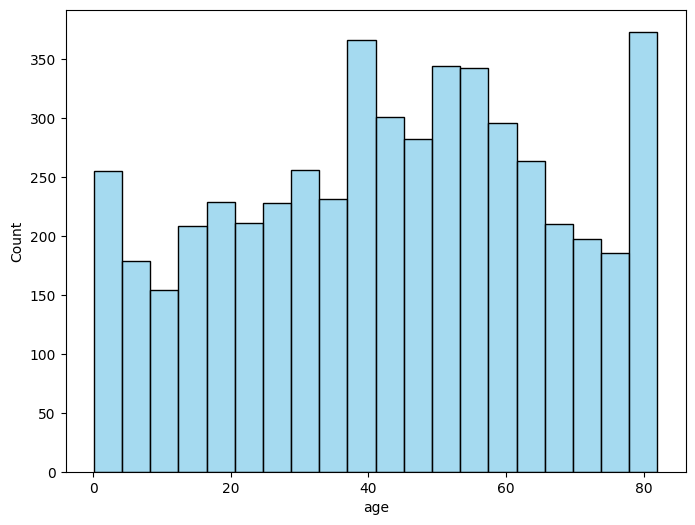

In [12]:
# Menampilkan Histogram Penyebaran Umur 

# Membuat subplot
fig, axes = plt.subplots(1, 1, figsize=(8, 6))
# Membuat histogram menggunakan Seaborn
sns.histplot(data=df, x='age', color='skyblue')
plt.show()

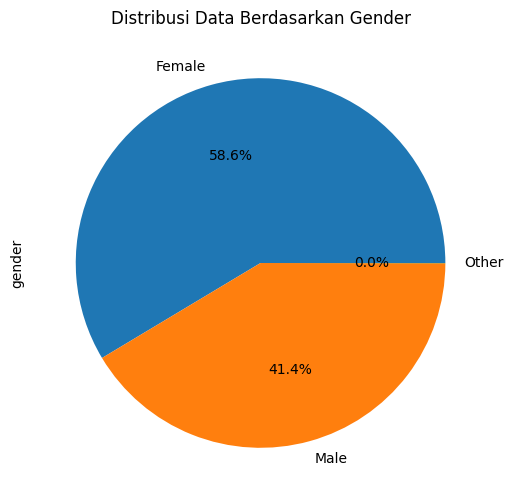

In [13]:
#plotting a pie chart of Distribusi berdasarkan Gender

plt.figure(figsize=(8,6))
df['gender'].value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.title('Distribusi Data Berdasarkan Gender')
plt.show()

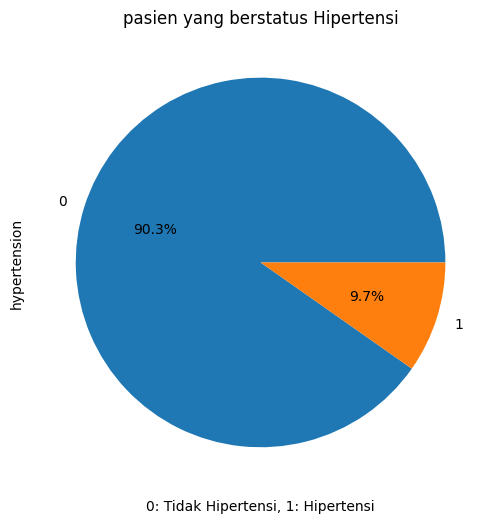

In [14]:
# membuat diagram Pie Jumlah orang yang berstatus Hipertensi
plt.figure(figsize=(8,6))
df['hypertension'].value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.title("pasien yang berstatus Hipertensi")
plt.xlabel('0: Tidak Hipertensi, 1: Hipertensi')
plt.show()

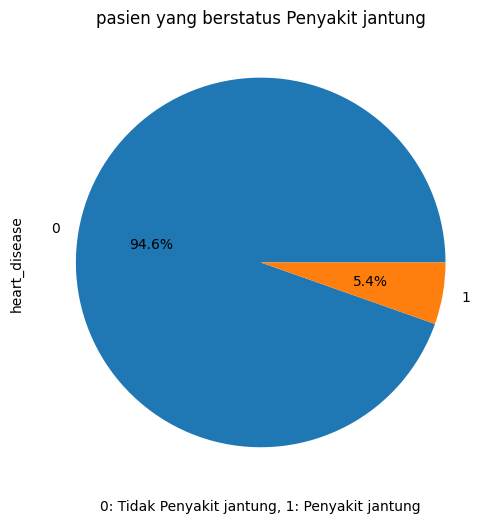

In [15]:
# membuat diagram Pie Jumlah orang yang berstatus Penyakit jantung
plt.figure(figsize=(8,6))
df['heart_disease'].value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.title("pasien yang berstatus Penyakit jantung")
plt.xlabel('0: Tidak Penyakit jantung, 1: Penyakit jantung')
plt.show()

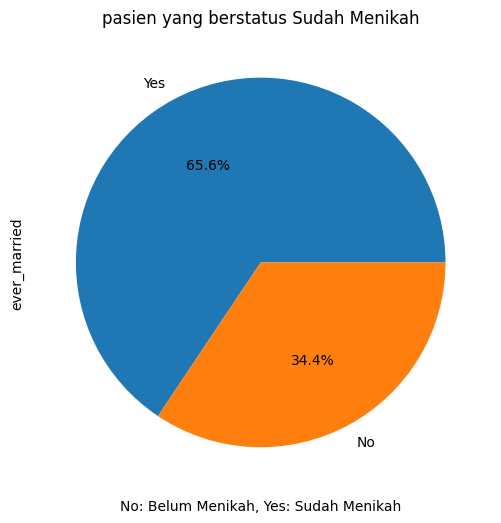

In [16]:
# membuat diagram Pie Jumlah orang yang berstatus Sudah Menikah
plt.figure(figsize=(8,6))
df['ever_married'].value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.title("pasien yang berstatus Sudah Menikah")
plt.xlabel('No: Belum Menikah, Yes: Sudah Menikah')
plt.show()

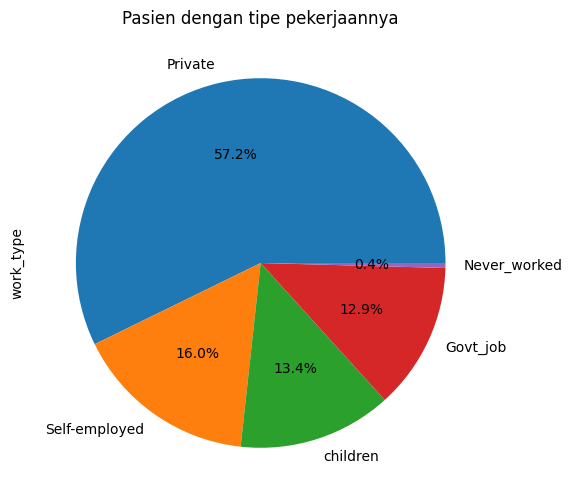

In [17]:
# membuat diagram Pie Jumlah orang yang dengan tipe kerjaanya
plt.figure(figsize=(8,6))
df['work_type'].value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.title("Pasien dengan tipe pekerjaannya")
plt.show()

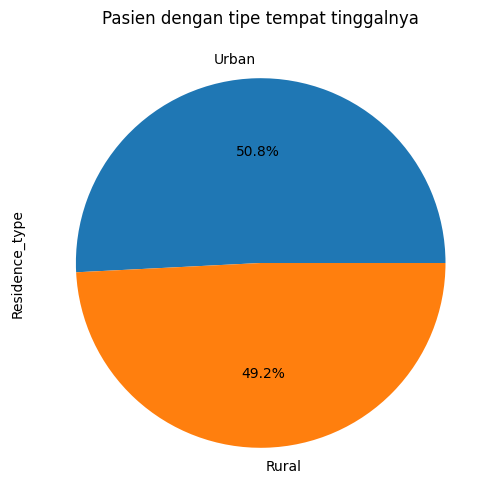

In [18]:
# membuat diagram Pie Jumlah orang yang dengan tipe tempat tinggalnya
plt.figure(figsize=(8,6))
df['Residence_type'].value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.title("Pasien dengan tipe tempat tinggalnya")
plt.show()

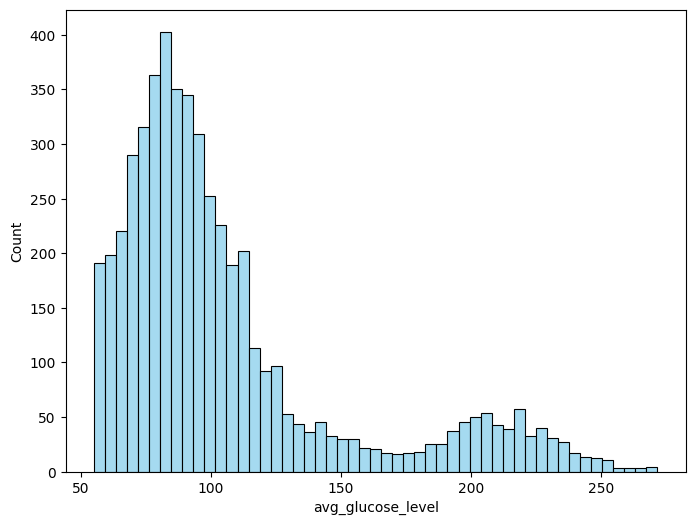

In [19]:
# Menampilkan Histogram Penyebaran aglucosa level 

# Membuat subplot
fig, axes = plt.subplots(1, 1, figsize=(8, 6))
# Membuat histogram menggunakan Seaborn
sns.histplot(data=df, x='avg_glucose_level', color='skyblue')
plt.show()

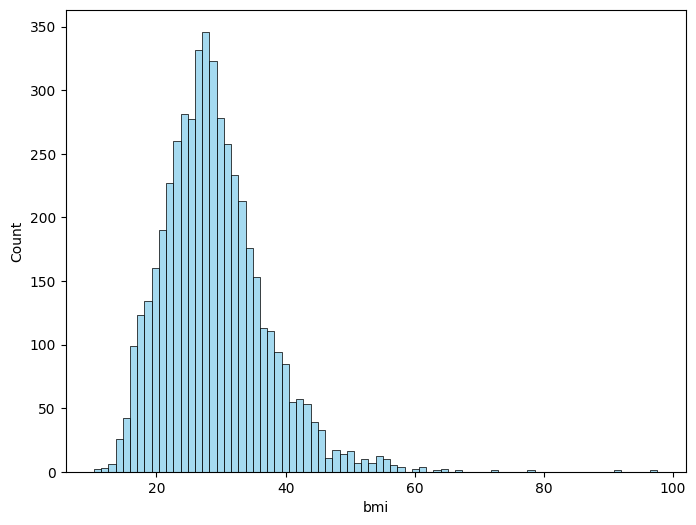

In [20]:
# Menampilkan Histogram Penyebaran BMI

# Membuat subplot
fig, axes = plt.subplots(1, 1, figsize=(8, 6))
# Membuat histogram menggunakan Seaborn
sns.histplot(data=df, x='bmi', color='skyblue')
plt.show()

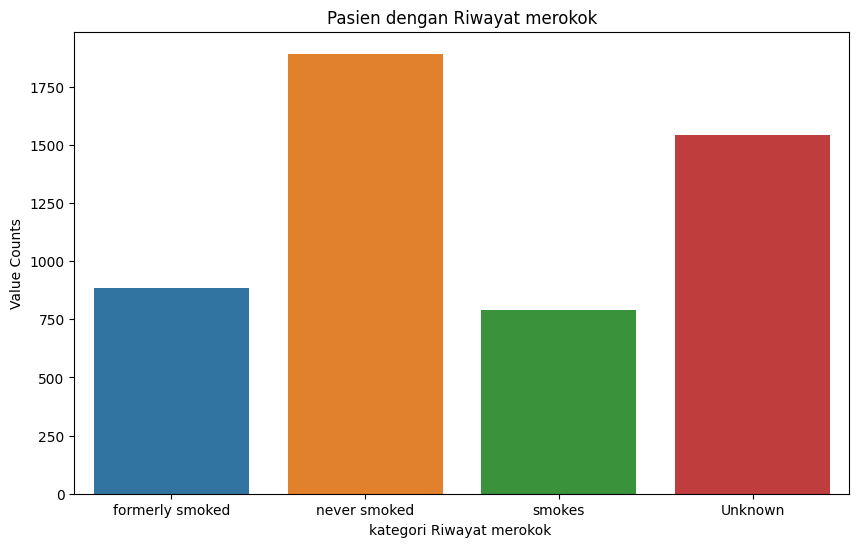

In [21]:

# Menampilkan plot count Jumlah orang di setiap ategori Riwayat merokok 
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='smoking_status')
plt.xlabel("kategori Riwayat merokok ")
plt.ylabel("Value Counts")
plt.title("Pasien dengan Riwayat merokok")
plt.show()

<Axes: xlabel='stroke', ylabel='Count'>

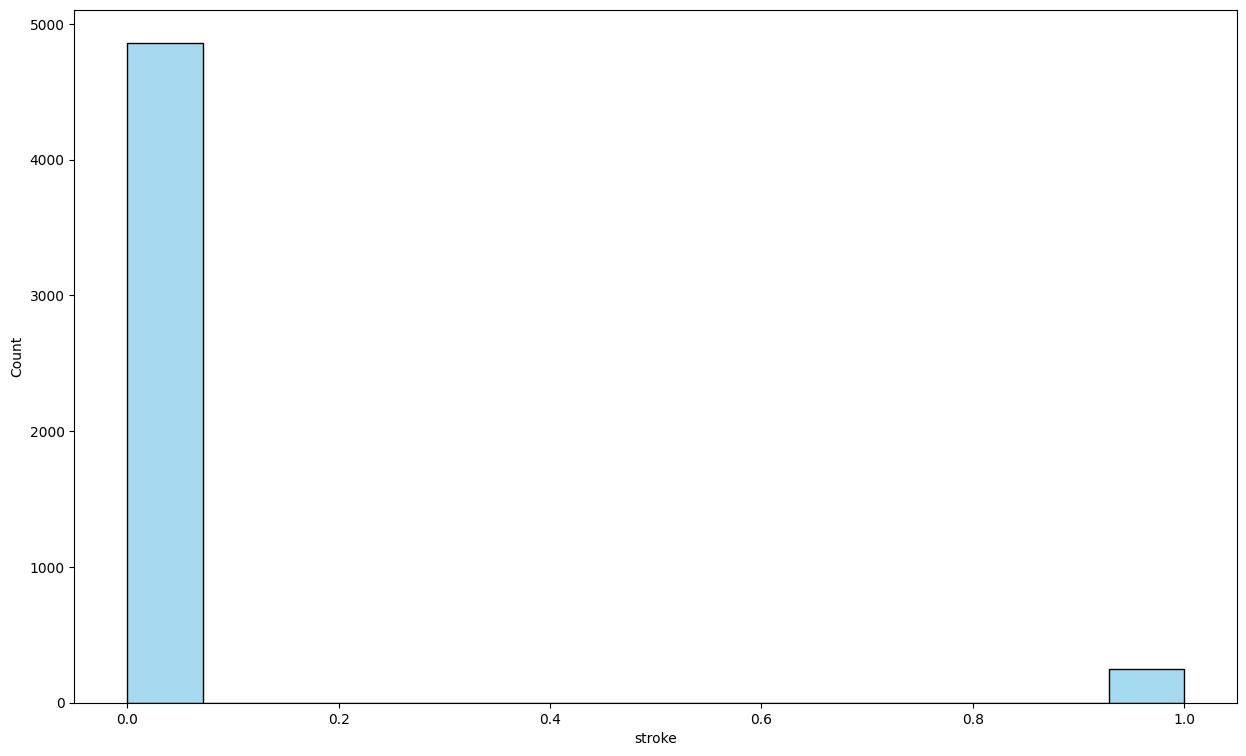

In [22]:
# Mengecek Imbalance data label (Keseimbangan Data)
fig,axes = plt.subplots(1,1, figsize = (15,9))

sns.histplot(data=df, x='stroke',color='skyblue')

C:\Users\daffa\AppData\Local\Temp\ipykernel_16672\962229949.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


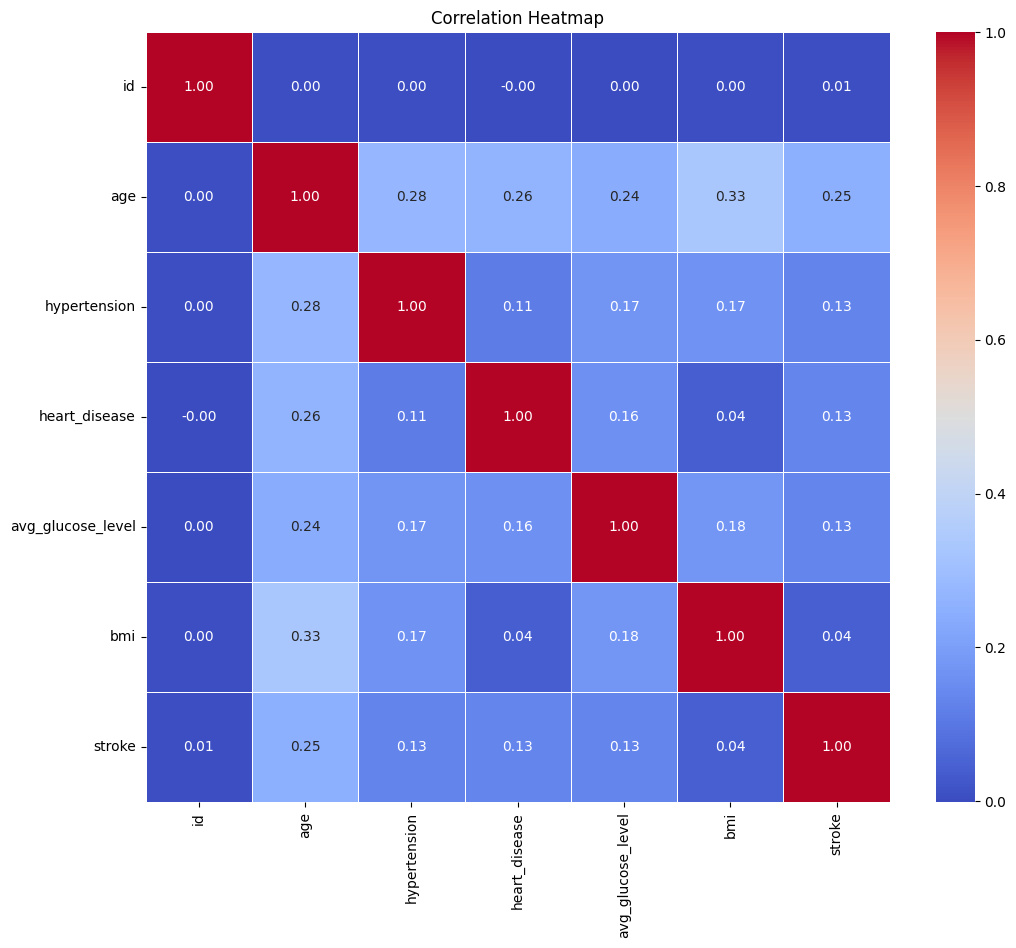

In [23]:
# Menampilkan heat map Korelasi
corr_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title("Correlation Heatmap")
plt.show()

# Pre-procesing

In [24]:
# Hapus kolom 'id' dan 'age' karna id tidak berealasi dengan kolom apapun
df=df.drop(columns=['id'],axis=1)
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [25]:
# mengganti nilai missing values kolom BMI dengan rata"/mean
mean = df["bmi"].mean()
df["bmi"] = df["bmi"].replace(np.nan, mean)
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


In [26]:
# Menghapus baris dengan nilai 'Other' pada kolom 'Gender'
df = df[df['gender'] != 'Other']

In [27]:
# Menghapus baris dengan nilai 'Unknown' pada kolom 'smoking_status'
df = df[df['smoking_status'] != 'Unknown']
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5102,Female,57.0,0,0,Yes,Private,Rural,77.93,21.700000,never smoked,0
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0


In [28]:
# (Data Tranformasi) Merubah data objek/kategorikal menjadi integer/numerik agar bisa di lakukan perhitungan
# Menggunakan library Label Encoder / Label Encoding
encode = LabelEncoder()

df['gender'] = encode.fit_transform(df['gender'].values)
df['ever_married'] = encode.fit_transform(df['ever_married'].values)
df['work_type'] = encode.fit_transform(df['work_type'].values)
df['Residence_type'] = encode.fit_transform(df['Residence_type'].values)
df['smoking_status'] = encode.fit_transform(df['smoking_status'].values)

df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.600000,0,1
1,0,61.0,0,0,1,3,0,202.21,28.893237,1,1
2,1,80.0,0,1,1,2,0,105.92,32.500000,1,1
3,0,49.0,0,0,1,2,1,171.23,34.400000,2,1
4,0,79.0,1,0,1,3,0,174.12,24.000000,1,1
...,...,...,...,...,...,...,...,...,...,...,...
5102,0,57.0,0,0,1,2,0,77.93,21.700000,1,0
5105,0,80.0,1,0,1,2,1,83.75,28.893237,1,0
5106,0,81.0,0,0,1,3,1,125.20,40.000000,1,0
5107,0,35.0,0,0,1,3,0,82.99,30.600000,1,0


In [29]:
# Memisahkan data Feature(x) dan label(y)
X = df.drop(columns= 'stroke',axis=1)
Y = df['stroke']

In [30]:
X

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1,67.0,0,1,1,2,1,228.69,36.600000,0
1,0,61.0,0,0,1,3,0,202.21,28.893237,1
2,1,80.0,0,1,1,2,0,105.92,32.500000,1
3,0,49.0,0,0,1,2,1,171.23,34.400000,2
4,0,79.0,1,0,1,3,0,174.12,24.000000,1
...,...,...,...,...,...,...,...,...,...,...
5102,0,57.0,0,0,1,2,0,77.93,21.700000,1
5105,0,80.0,1,0,1,2,1,83.75,28.893237,1
5106,0,81.0,0,0,1,3,1,125.20,40.000000,1
5107,0,35.0,0,0,1,3,0,82.99,30.600000,1


In [31]:
Y

0       1
1       1
2       1
3       1
4       1
       ..
5102    0
5105    0
5106    0
5107    0
5108    0
Name: stroke, Length: 3565, dtype: int64

In [32]:
# cek  jumlah data
print(X.shape)
print(Y.shape)

(3565, 10)
(3565,)


### SMOTE (Synthetic Minority Over-sampling Technique)(Imbalance Data)

In [33]:
# SMOTE

from imblearn.over_sampling import SMOTE

In [34]:
sm = SMOTE(random_state=30)
# sampling SMOTE
X_sampling, Y_sampling =sm.fit_resample(X,Y)

In [35]:
# Cek jumlah data setelah di oversampling
print(X_sampling.shape)
print(Y_sampling.shape)

(6726, 10)
(6726,)


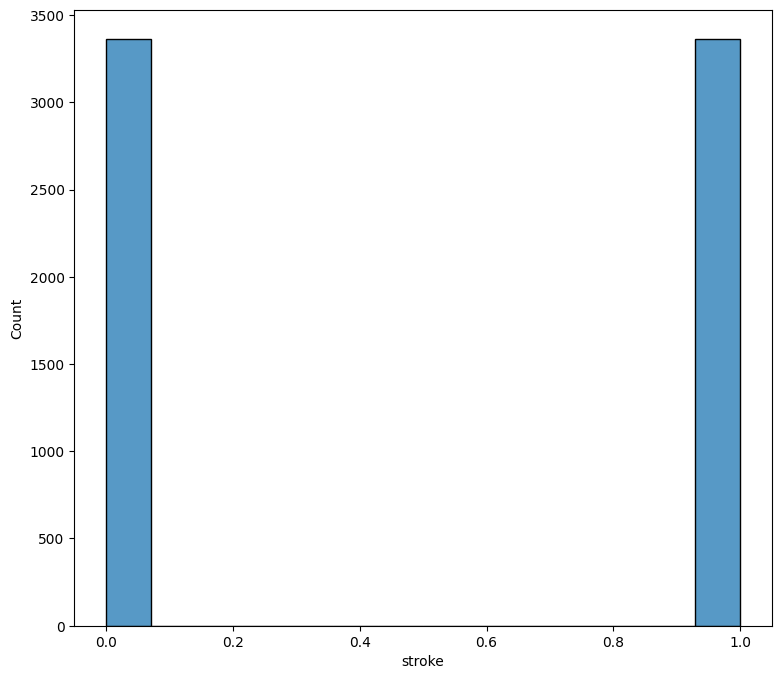

In [36]:
# Lihat visualisasi keseimbangan data terbaru
fig = plt.subplots(figsize=(9,8))
sns.histplot(data=Y_sampling)
plt.show()

### Pisahkan data training dan data testing

In [37]:
# membuat data size 0,2 artinya data testing 20% dan data training 80%
X_train, X_test, Y_train, Y_test = train_test_split(X_sampling, Y_sampling, test_size=0.2, stratify=Y_sampling, random_state=2)

In [38]:
# menampilkan data size
print("Jumlah data X = ", X_sampling.shape, "|Jumlah data X_train = ", X_train.shape, "|Jumlah data X_test = ", X_test.shape)

Jumlah data X =  (6726, 10) |Jumlah data X_train =  (5380, 10) |Jumlah data X_test =  (1346, 10)


### Melakukan Normalisasi Data

In [39]:
1.	# normalisasi fitur dengan StandardScaler.	

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Membuat Model Training

In [40]:

# Inisialisasi Model Random Forest
ranFor = RandomForestClassifier(n_estimators=100, random_state=42)
ranFor.fit(X_train, Y_train)

RandomForestClassifier(random_state=42)

### Evaluasi Model

In [41]:
# akurasi dengan Model Random Forest
X_test_prediction = ranFor.predict(X_test)
test_accuracy = accuracy_score(X_test_prediction, Y_test)

print('Akurasi Data Testing (Euclidien) :', test_accuracy)

Akurasi Data Testing (Euclidien) : 0.9294205052005944


### Confusion Matrix

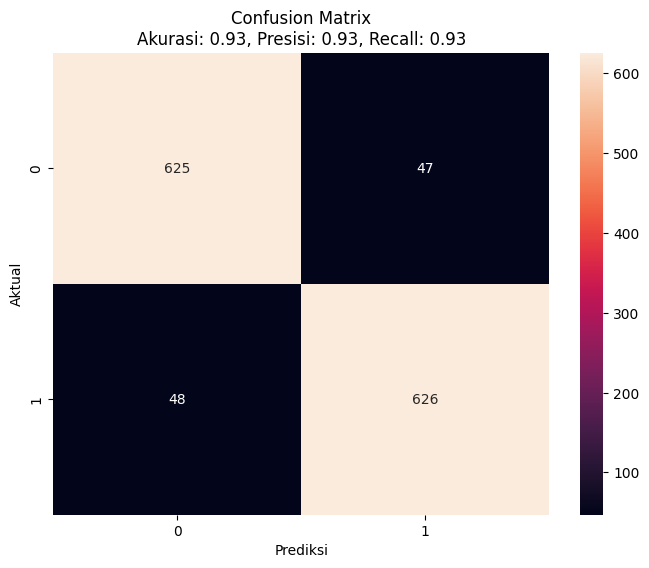

In [42]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
import matplotlib.pyplot as plt
import seaborn as sns

# Hitung confusion matrix
cm = confusion_matrix(X_test_prediction, Y_test)

# Hitung metrik akurasi, presisi, dan recall
accuracy = accuracy_score(Y_test, X_test_prediction)
precision = precision_score(Y_test, X_test_prediction)
recall = recall_score(Y_test, X_test_prediction)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title(f'Confusion Matrix\nAkurasi: {accuracy:.2f}, Presisi: {precision:.2f}, Recall: {recall:.2f}')
plt.show()

# Buat model Klasifikasi

In [43]:
# Mencoba Mem-prediksi data inputan

#input_data = (1,67.0,0,1,1,2,1,228.69,36.6,0) # 1
input_data = (0,	57.0,	0,	0,	1,	2,	0, 77.93,	21.700000,	1) # 1
#input_data = (1, 80.0, 0, 1, 1, 2, 0, 105.92, 36.5, 1) # 1


input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)


prediction = ranFor.predict(input_data_reshaped)
print(prediction)

if(prediction[0]== 0):
  print('Pasien Tidak Terkena Penyakit Stroke')
else:
  print('Pasien Terkena Penyakit Stroke')

[0]
Pasien Tidak Terkena Penyakit Stroke


In [44]:
# Menyimpan Model

import pickle
filename = 'stroke_RF_Model.sav'
pickle.dump(ranFor, open(filename, 'wb'))